This notebook demonstrates how to simulate quantum states, measurements and operations in Qiskit. It follows [the tutorial](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems#states-measurements-and-operations) at the end of [Lesson 01 (Single Systems)](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems).

Firstly, we'll import the relevant libraries and define some state vectors.

In [23]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

## State vectors
We can create quantum state vectors easily using Qiskit's `Statevector` class.

In [24]:
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])  # (This is the |+⟩ ('ket plus') state vector.)
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

We can display these state vectors as a single line, in more easily readable LaTeX format, or as LaTeX source code. For example, we can display the `u` state vector in all three ways:

In [25]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


We can also check whether a state vector is valid by calling the `Statevector.is_valid()` method on it. Remember that the criterion for a state vector to be valid is that its Euclidean norm equals 1.

In [26]:
display(u.is_valid())  # u is a valid state vector
display(w.is_valid())  # w is not a valid state vector

True

False

## Measurements
We can use the `Statevector.measure()` method to perform a measurement on a state vector. For example, for the state vector `v` that we defined previously,

In [27]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

we can measure it as follows:

In [28]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

Note that, because measurement outcomes are probabilistic, the `measure()` method can return different results when run multiple times. You can see this for yourself by running the code cell above a few times. The output is either $$(\frac{\sqrt{5}}{5} + \frac{2 \sqrt{5} i}{5}) |0\rangle$$ or $$|1\rangle$$

We can also use the `sample_counts()` method on `Statevector` to run a measurement multiple times to show how the output is probabilistic. We can then plot the results of these runs using `plot_histogram()` from qiskit's `visualization` library:

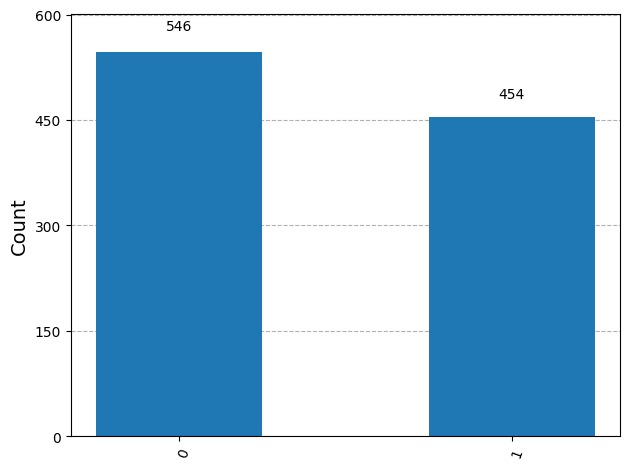

In [29]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)